<h1><center>Predict the default of Credit Card holder</center></h1>
<h2><center>Group 1: 
Li, Qiao; Shu, Chuyun; Xia, Zhihang; Yu, Shuqi; Yuan, Serena; Zhang, Renyin </center></h2>

# Introduction

# Context
Our study took payment data in October, 2005, from an
important bank (a cash and credit card issuer) in Taiwan
and the targets were credit card holders of the bank.
Among the total 25,000 observations, 5529 observations
(22.12%) are the cardholders with default payment. This
research employed a binary variable – default payment
(Yes = 1, No = 0), as the response variable.

# Content
Following 23 variables as explanatory variables:
 
 X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
 
 X2: Gender (1 = male; 2 = female).
 
 X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).

 X4: Marital status (1 = married; 2 = single; 3 = others).
 
 X5: Age (year).
 
 X6–X11: History of past payment. We tracked the past monthly payment records (from April to September,2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August,2005;...;X11 = the repayment status in April, 2005.
The measurement scale for the repayment status is:
1 = pay duly; 1 = payment delay for one month;2 = payment delay for two months; ...; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
 
 X12–X17: Amount of bill statement (NT dollar).(X12 = amount of bill statement in September,2005; X13 = amount of bill statement in August,2005 ;...; X17 = amount of bill statement in April,2005.)
 
 X18–X23: Amount of previous payment (NT dollar).(X18 = amount paid in September, 2005; X19 = amount paid in August, 2005;...;X23 = amount paid in April,2005.) 

#  Set up the environment
First, make sure you have python installed. 

In [ ]:
!python --version

If you don't have python installed - please follow this [link](https://realpython.com/installing-python/) for instructions.

Running the cell below will start the installation of required python libraries, assuming you have python already installed.


In [ ]:
!pip install pandas
!pip install numpy 
!pip install seaborn
!pip install matplotlib
!pip install plotly
!pip install iplot
!pip install seaborn

In [1]:
#import the librarys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py
import plotly.graph_objs as go
from collections import Counter
from sklearn.model_selection import train_test_split
from plotly.offline import *
%matplotlib inline
np.random.seed(2021)
from imblearn.over_sampling import RandomOverSampler
from imblearn.combine import SMOTETomek
from imblearn.over_sampling import SMOTE


#  Load Default of Credit Card Clients data
The data was randomly divided into two groups, one for model training and the other to validate the model.

In [10]:
#df_credit_raw = pd.read_excel ("../data/default of credit card clients.xls")
df_credit_raw = pd.read_excel ("/Users/yyyyushuqi/Downloads/default of credit card clients.xls")
#df_credit_raw =  pd.read_excel('default_of_credit_card_clients.xls')
print (df_credit_raw.shape)

(30001, 25)


In [11]:
df_credit = df_credit_raw.iloc[1:,1:]
print(df_credit.shape)
df_credit.head(10)

(30000, 24)


,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
6,50000,1,1,2,37,0,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,0
7,500000,1,1,2,29,0,0,0,0,0,...,542653,483003,473944,55000,40000,38000,20239,13750,13770,0
8,100000,2,2,2,23,0,-1,-1,0,0,...,221,-159,567,380,601,0,581,1687,1542,0
9,140000,2,3,1,28,0,0,2,0,0,...,12211,11793,3719,3329,0,432,1000,1000,1000,0
10,20000,1,3,2,35,-2,-2,-2,-2,-1,...,0,13007,13912,0,0,0,13007,1122,0,0


#  Split data to train and test

In [50]:
# split the data for training purpose

from sklearn.model_selection import train_test_split

X = df_credit.loc[:, df_credit.columns != 'Y']
y = df_credit['Y'].values.astype('int')

X_train,X_test,y_train,y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=0)
X_train.columns.values

array(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11',
       'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20',
       'X21', 'X22', 'X23'], dtype=object)

In [51]:
X_train.head(3)

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23
6671,320000,1,1,2,26,-1,0,0,0,0,...,13917,12125,0,0,1267,1700,243,0,0,220000
12887,200000,1,1,1,40,-1,-1,-1,-1,-1,...,6360,2620,5900,37084,5007,7096,2620,6000,17703,4914
16219,120000,2,1,2,45,0,0,0,0,0,...,87941,89737,95451,97379,3079,3185,3251,7200,3600,3900


In [52]:
X_train1 = pd.DataFrame(X_train)
Data = X_train1
Data['Y']= y_train

In [53]:
Data.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
6671,320000,1,1,2,26,-1,0,0,0,0,...,12125,0,0,1267,1700,243,0,0,220000,0
12887,200000,1,1,1,40,-1,-1,-1,-1,-1,...,2620,5900,37084,5007,7096,2620,6000,17703,4914,1
16219,120000,2,1,2,45,0,0,0,0,0,...,89737,95451,97379,3079,3185,3251,7200,3600,3900,0
5773,20000,2,1,2,22,-2,-2,-2,-2,-2,...,304,0,302,0,913,304,0,302,7676,0
22647,30000,2,3,1,42,0,0,0,0,0,...,2592,30094,29147,1371,1210,1000,30000,1046,1390,1


#  deal with the imbalance data

### Oversampling

In [47]:
df_credit['Y'] = df_credit['Y'].astype('category')
ovs = RandomOverSampler(random_state = 42)
x1,y1 = ovs.fit_resample(Data.iloc[: , 0:-1],Data.Y)
df_credit_oversampling=x1
df_credit_oversampling["Y"]=y1
print("DATA_oversampling \ngood class:", len(df_credit_oversampling[df_credit_oversampling.Y == 0]),
      "\nBad Class:", len(df_credit_oversampling[df_credit_oversampling.Y == 1]))

DATA_oversampling 
good class: 18691 
Bad Class: 18691


### Smote

In [48]:
X_smote, y_smote = SMOTE().fit_resample(Data.iloc[:, 0:-1], Data.Y)
Counter(y_smote).items()

dict_items([(0, 18691), (1, 18691)])

# Feature Selection

In [9]:
# with LASSO
from sklearn.linear_model import LogisticRegression

logr = LogisticRegression(C=0.1, penalty="l1", solver="liblinear", random_state=0)
logr.fit(X_train, y_train)
sorted_tuples = sorted(list(zip(X_train.columns.values,logr.coef_[0])),key=lambda x:x[1],reverse=True)
for feature,coef in sorted_tuples:
    print(f'{feature:30s} : {coef: 0.3f}')

print(f'\nColumns to remove: {X_train.columns[logr.coef_[0] == 0]}')

X6                             :  0.717
X13                            :  0.294
X14                            :  0.125
X7                             :  0.103
X17                            :  0.091
X8                             :  0.091
X5                             :  0.085
X9                             :  0.030
X10                            :  0.020
X16                            :  0.001
X15                            : -0.021
X11                            : -0.042
X23                            : -0.051
X20                            : -0.063
X2                             : -0.065
X4                             : -0.070
X1                             : -0.074
X21                            : -0.085
X22                            : -0.087
X3                             : -0.089
X19                            : -0.224
X18                            : -0.277
X12                            : -0.579

Columns to remove: Index([], dtype='object')


In [10]:
# Tree based model feature importance
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=123).fit(X_train,y_train)
rf.feature_importances_ # (normalized) total reduction of function measuring impurity
feature_importances = pd.Series(rf.feature_importances_,index=X_train.columns)
feature_importances.sort_values(ascending=False).round(3)

X6     0.137
X7     0.078
X2     0.068
X4     0.057
X8     0.052
X12    0.044
X3     0.043
X1     0.042
X5     0.040
X18    0.038
X13    0.034
X9     0.034
X19    0.033
X20    0.033
X14    0.032
X15    0.031
X10    0.031
X16    0.030
X11    0.030
X17    0.030
X23    0.030
X21    0.029
X22    0.027
dtype: float64

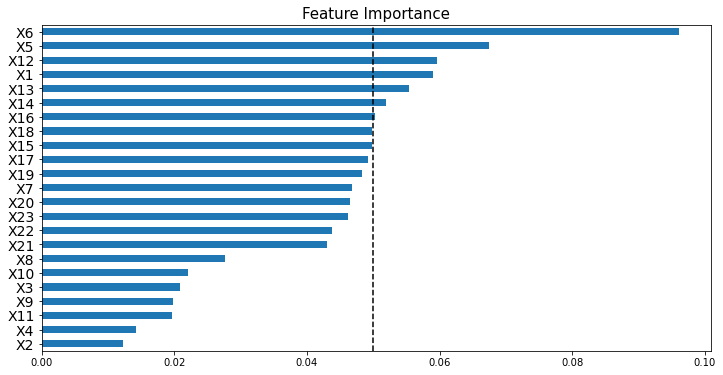

In [9]:
fig,ax = plt.subplots(1,1,figsize=(12,6))
feature_importances.sort_values().plot.barh(ax=ax);
ax.set_yticklabels(ax.get_yticklabels(),fontsize=14);
ax.set_title('Feature Importance', fontsize=15);
plt.axvline(x=0.05, color='k', linestyle='--');

In [10]:
# SelectFromModel
from sklearn.feature_selection import SelectFromModel

sfm = SelectFromModel(logr,threshold=None, prefit=True)
sfm.get_support() # boolean mask of features selected
X_train.columns[sfm.get_support()]
X_train_subset = sfm.transform(X_train)

sfm_rf = SelectFromModel(RandomForestClassifier(), threshold='mean',prefit=False).fit(X_train,y_train)
print(f'select features: {X_train.columns[sfm_rf.get_support()]}')

select features: Index(['X1', 'X5', 'X6', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18',
       'X19', 'X20', 'X21', 'X23'],
      dtype='object')


In [11]:
# Univariate tests
from sklearn.feature_selection import SelectKBest, f_classif

# select 3 best features
kbest = SelectKBest(score_func=f_classif, k=3).fit(X_train, y_train)
list(X.columns[kbest.get_support()])

['X6', 'X7', 'X8']

In [12]:
# Recursive Feature Elimination
from sklearn.feature_selection import RFE

rfe = RFE(LogisticRegression(penalty='none'), n_features_to_select=3, step=1).fit(X_train,y_train)
X_train.columns[rfe.get_support()]

Index(['X6', 'X12', 'X13'], dtype='object')

#  Build and Evaluate Advanced Model: 

## Gradient Boosting 

In [9]:
from sklearn.ensemble import GradientBoostingClassifier

#params = {'learning_rate':[0.1,0.05,0.01],
#          'n_estimators':[10,50,100],
#          'max_depth':[1,2,5,7],
#          'min_samples_split': [2,3,4],
#          'min_samples_leaf':[1,3,5]}
#gscv = GridSearchCV(GradientBoostingClassifier(), params, n_jobs=-1)
#gscv.fit(X_train,y_train)
#print(gscv.best_params_)

In [10]:
# best params output{'learning_rate': 0.1, 'max_depth': 7, 'min_samples_leaf': 3, 'min_samples_split': 4, 'n_estimators': 100}

In [11]:
start = timeit.default_timer()

gbc = GradientBoostingClassifier(learning_rate=0.1,
                                 max_depth=7,
                                 min_samples_leaf=3,
                                 min_samples_split=4,
                                 n_estimators=100,
                                 )
gbc.fit(X_train,y_train)

stop = timeit.default_timer()

print(f'training accuracy: {gbc.score(X_smote,y_smote):0.4f}')
print(f'test accuracy: {gbc.score(X_test,y_test):0.4f}')
print(f'AUC: {roc_auc_score(y_test, gbc.predict(X_test)):0.4f}')
print('Time: ', round(stop - start, 4), 's')

training accuracy: 0.9050
test accuracy: 0.8183
AUC: 0.6620
Time:  29.3384 s


##  Gradient Boosting with Feature Selection

X6     0.4027
X4     0.1260
X2     0.0705
X12    0.0584
X3     0.0578
X7     0.0513
X9     0.0329
X8     0.0296
X1     0.0201
X19    0.0176
X11    0.0170
X20    0.0156
X10    0.0134
X18    0.0118
X5     0.0115
X23    0.0103
X13    0.0090
X21    0.0087
X14    0.0085
X15    0.0072
X17    0.0069
X16    0.0067
X22    0.0062
dtype: float64

<AxesSubplot:>

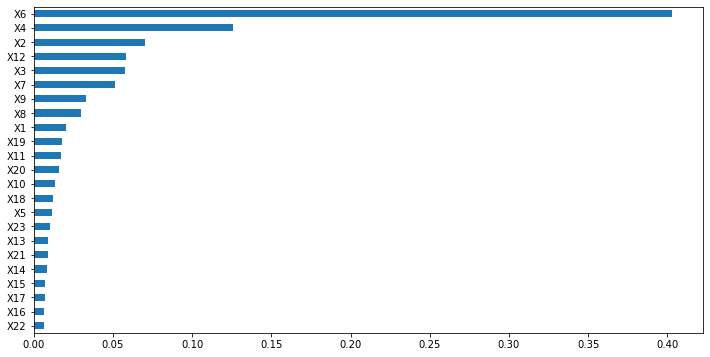

In [12]:
feature_importances = pd.Series(gbc.feature_importances_,index=X_smote.columns)
display(feature_importances.sort_values(ascending=False).round(4))

fig,ax = plt.subplots(1,1,figsize=(12,6))
feature_importances.sort_values().plot.barh(ax=ax)

In [13]:
from sklearn.feature_selection import SelectFromModel

sfm = SelectFromModel(gbc,
                      threshold='mean',
                      prefit=True)

X_train.columns[sfm.get_support()]

Index(['X2', 'X3', 'X4', 'X6', 'X7', 'X12'], dtype='object')

In [14]:
X_train_fs = sfm.transform(X_smote)
X_test_fs = sfm.transform(X_smote)

In [15]:
#params = {'learning_rate':[0.1,0.05,0.01],
#          'n_estimators':[10,50,100],
#          'max_depth':[1,2,5,7],
#          'min_samples_split': [2,3,4],
#          'min_samples_leaf':[1,3,5]}
#gscv = GridSearchCV(GradientBoostingClassifier(), params, n_jobs=-1)
#gscv.fit(X_train_fs,y_train)
#print(gscv.best_params_)

In [16]:
#best params output:{'learning_rate': 0.05, 'max_depth': 5, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 100}

In [17]:
start = timeit.default_timer()

gbc_fs = GradientBoostingClassifier(learning_rate=0.05,
                                 max_depth=5,
                                 min_samples_leaf=3,
                                 min_samples_split=2,
                                 n_estimators=100,
                                 )
gbc_fs.fit(X_train_fs,y_train)

stop = timeit.default_timer()

print(f'training accuracy: {gbc_fs.score(X_train_fs,y_train):0.4f}')
print(f'test accuracy: {gbc_fs.score(X_test_fs,y_test):0.4f}')
print(f'AUC: {roc_auc_score(y_test, gbc_fs.predict(X_test_fs)):0.4f}')
print('Time: ', round(stop - start, 4), 's')

training accuracy: 0.8733
test accuracy: 0.8168
AUC: 0.6453
Time:  4.2256 s
